#Week HW4 by Dmitriev Egor
[Link to watch online](https://colab.research.google.com/drive/1GKGCrh0eKAJe9Y7N4I9U6JzknPaErZF9)

In [ ]:
import numpy as np
import sympy as sp
from sympy import *

# Task 1

## Given

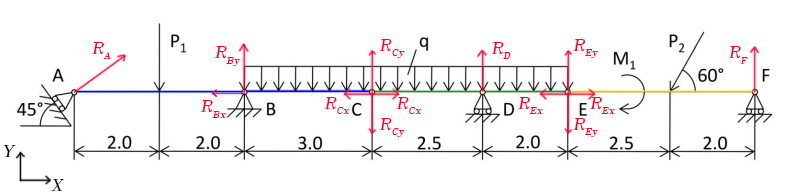

$P_1 = 12,\ P_2 = 18,\ M_1 = 36,\ q = 1.4.$

The studs and acting forces are shown.

## To find

Determine the reaction forces and the forces in the interim pins of the composite stud.

## Solution

### Objects of research:

$ABC \text{ (Blue)},\ CDE \text{ (Green)},\ EF \text{ (Yellow)}$

### Force analysis:

#### Body $ABC$

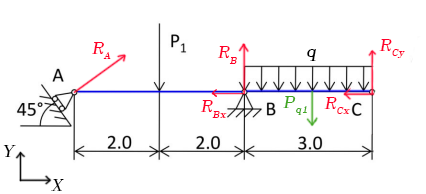

* Affected by: $R_A,\ R_B,\ R_C,\ P_1,\ q$
 * To find: $R_A,\ R_B,\ R_C$
 * Known: $P_1, q$

Distributed force $q$ can be replaced with $P_{q1}$ applied to the center of the beam $BC$ directed downwards with magnitude of $P_{q1} = BC*q = 3q = 4.2$

$$
X:\ R_a sin(45°) - R_{Bx} - R_{Cx} = 0\\
Y:\ R_a cos(45°) + R_{By} + R_{Cy} - P_q - P_{q1} = 0\\
M:\ 4 R_a cos(45°) - 2 P_1 + 1.5 P_{q1} - 3 R_{Cy} = 0\\
$$

Assumed connection $B$ as a center of rotation.

$$
X:\ R_a\frac{\sqrt{2}}{2} - R_{Bx} - R_{Cx} = 0\\
Y:\ R_a\frac{\sqrt{2}}{2} + R_{By} + R_{Cy} - 12 - 4.2 = 0\\
M:\ 2\sqrt{2}R_a - 24 + 6.3 - 3 R_{Cy} = 0\\
$$

In [ ]:
sym1 = RA, RCx, RCy, RBx, RBy = symbols('RA, RCx, RCy, RBx, RBy')
eq1 = [RA/np.sqrt(2) - RBx - RCx,
       RA/np.sqrt(2) + RBy + RCy - 16.2,
       2*np.sqrt(2)*RA - 24 + 6.3 - 3 * RCy]
# linsolve(eq1, sym1)

#### Body $CDE$

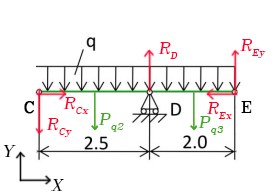

* Affected by: $R_C,\ R_D,\ R_E,\ q$
  * To find: $R_C,\ R_D,\ R_E$
  * Known: $q$

Distributed force $q$ can be replaced with $P_{q2},\ P_{q3}$ applied to centers of beams $CD,\ DE$ directed downwards with magnitudes of 
$P_{q2} = BC*q = 2.5q = 3.5;\\
P_{q3} = BC*q = 2q = 2.8$

$$
X:\ R_{Cx} - R_{Ex}  = 0\\
Y:\ R_D + R_{Ey} - R_{Cy} - P_{q2} - P_{q3} = 0\\
M:\ 2.5 R_{Cy} + 1.25 P_{q2} + 2 R_{Ey} - 1 P_{q3}= 0\\
$$

Assumed connection $D$ as a center of rotation.

$$
X:\ R_{Cx} - R_{Ex}  = 0\\
Y:\ R_D + R_{Ey} - R_{Cy} - 3.5 - 2.8 = 0\\
M:\ 2.5 R_{Cy} + 1.25 * 3.5 + 2 R_{Ey} - 2.8= 0\\
$$


In [ ]:
sym2 = RD, REx, REy = symbols('RD, REx, REy')
eq2 = [RCx - REx,
       RD + REy - RCy - 3.5 - 2.8,
       2.5*RCy + 1.25*3.5 + 2*REy - 2.8]
# linsolve(eq1 + eq2, sym1 + sym2)

#### Body $EF$

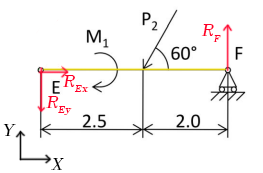

* Affected by: $R_E,\ M_1,\ P_2,\ R_F$
  * To find: $R_E,\ R_F$
  * Known: $M_1,\ P_2$

$$
X:\ R_{Ex} - P_2 cos(60°) = 0\\
Y:\ R_F - R_{Ey} - P_2sin(60°) = 0\\
M:\ 4.5 R_{Ey} + 2 P_2sin(60°) - M_1 = 0\\
$$

Assumed connection $F$ as a center of rotation.

$$
X:\ R_{Ex} - 9 = 0\\
Y:\ R_F - R_{Ey} - 9\sqrt{3} = 0\\
M:\ 4.5 R_{Ey} + 18\sqrt{3} - 36 = 0\\
$$

In [ ]:
RF = symbols('RF')
eq3 = [REx - 9,
       RF - REy - 9*np.sqrt(3),
       4.5*REy + 18*np.sqrt(3) - 36]
linsolve(eq1 + eq2 + eq3, sym1 + sym2 + (RF, ))

FiniteSet((4.68022938856844, 9.0, -1.48743741577959, -5.69057806183469, 14.3780154776143, 3.74076581449592, 9.0, 1.07179676972449, 16.6602540378444))

## $\underline{\text{Answer:}}$

In [ ]:
equations = eq1 + eq2 + eq3
symbols = sym1 + sym2 + (RF, )

ret = linsolve(equations, symbols)
ans = {symbols[i] : ret.args[0][i] for i in range(len(ret.args[0]))}
print(ans)

{RA: 4.68022938856844, RCx: 9.00000000000000, RCy: -1.48743741577959, RBx: -5.69057806183469, RBy: 14.3780154776143, RD: 3.74076581449592, REx: 9.00000000000000, REy: 1.07179676972449, RF: 16.6602540378444}


$
\begin{align}
RA:       &\underline{4.68022938856844},\\ 
\vec{RB}: &\underline{[-5.69057806183469, 14.3780154776143]},\\
\vec{RC}: &\underline{[9.00000000000000, -1.48743741577959]},\\
RD:       &\underline{3.74076581449592},\\
\vec{RE}: &\underline{[9.00000000000000, 1.07179676972449]},\\
RF:       &\underline{16.6602540378444}
\end{align}
$

# Task 2


## Given

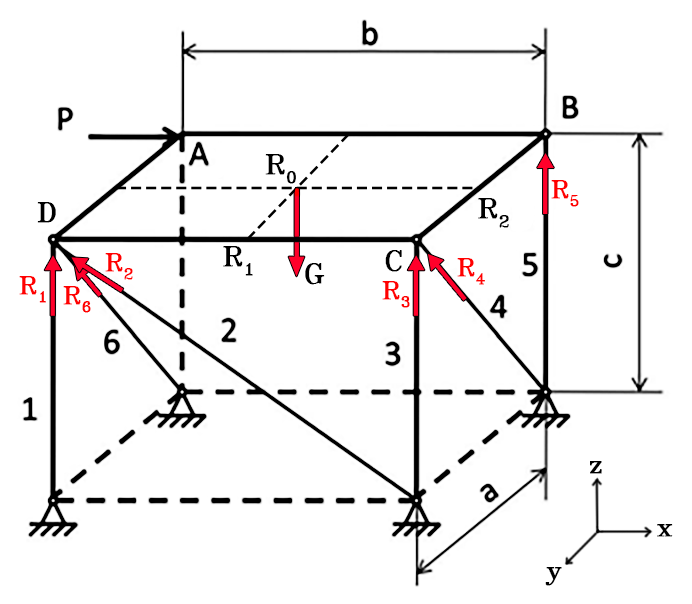

$a = 4,\ b = 4.5,\ c = 3.5;\\
G = 18,\ P = 30.$

## To Find

Reaction forces in rods: $R_1,\ R_2,\ R_3,\ R_4,\ R_5,\ R_6 - ?$


## Solution

#### Object of Research:

Plane $ABCD$, supported by perfect rods $1$ to $6$.

### Force analysis:

Translatory component: $\vec{R_1} + \vec{R_2} + \vec{R_3} + \vec{R_4} + \vec{R_5} + \vec{R_6} + \vec {P} + \vec{G} = \vec{0}$

* $\vec{R_1} + \vec{R_2} + \vec{R_3} + \vec{R_4} + \vec{R_5} + \vec{R_6} = - \vec {P} - \vec{G}$

Rotational component: $\vec{R_0D}\times(\vec{R_1} + \vec{R_2} + \vec{R_6}) + \vec{R_0C}\times(\vec{R_3} + \vec{R_4}) + \vec{R_0B}\times\vec{R_5} + \vec{R_0A}\times\vec{P} + \vec{0}\times\vec{G} = \vec{0}$

* $\vec{R_0D}\times(\vec{R_1} + \vec{R_2} + \vec{R_6}) + \vec{R_0C}\times(\vec{R_3} + \vec{R_4}) + \vec{R_0B}\times\vec{R_5} = - \vec{R_0A}\times\vec{P}$

Perfect rods $1$ to $6$ can only provide force along themself. Let's wirte them in vector forms.

$$
\begin{matrix}
&\vec{R_1} = 
  \begin{bmatrix} 
  0 \\
  0 \\ 
  1 
  \end{bmatrix} R_1
,\
&\vec{R_2} = 
  \begin{bmatrix} 
  -b/\sqrt{b^2+c^2} \\
  0 \\
  c/\sqrt{b^2+c^2}
  \end{bmatrix} R_2
,\ 
&\vec{R_3} = 
  \begin{bmatrix} 
  0 \\
  0 \\ 
  1 
  \end{bmatrix} R_3
\\
&\vec{R_4} = 
  \begin{bmatrix} 
  0 \\ 
  a/\sqrt{a^2+c^2} \\
  c/\sqrt{a^2+c^2}
  \end{bmatrix} R_4
,\
&\vec{R_5} = 
  \begin{bmatrix} 
  0 \\
  0 \\ 
  1 
  \end{bmatrix} R_5
,\
&\vec{R_6} = 
  \begin{bmatrix} 
  0 \\ 
  a/\sqrt{a^2+c^2} \\
  c/\sqrt{a^2+c^2}
  \end{bmatrix} R_6
\\
&\vec {P} = 
  \begin{bmatrix} 
  1 \\
  0 \\ 
  0 
  \end{bmatrix} P
,\
&\vec{G} = 
  \begin{bmatrix} 
  0 \\
  0 \\ 
  -1 
  \end{bmatrix} G
\end{matrix}
$$

$$
\begin{matrix} 
&\vec{R_0A} =   
\begin{bmatrix} 
  -b/2 \\
  -a/2 \\ 
  0 
\end{bmatrix}
,\ 
&\vec{R_0B} = 
\begin{bmatrix} 
  b/2 \\
  -a/2 \\ 
  0 
\end{bmatrix}
\\
&\vec{R_0C} = 
\begin{bmatrix} 
  b/2 \\
  a/2 \\ 
  0 
\end{bmatrix}
,\ 
&\vec{R_0D} = 
\begin{bmatrix} 
  -b/2 \\
  a/2 \\ 
  0 
\end{bmatrix}
\end{matrix} 
$$

### Solve a system of linear eqauations:

$$
\begin{bmatrix}
\vec{R_1} & \vec{R_2} & \vec{R_3} & \vec{R_4} & \vec{R_5} & \vec{R_6} \\
\vec{R_0D}\times\vec{R_1} & \vec{R_0D}\times\vec{R_2} & \vec{R_0C}\times\vec{R_3} & \vec{R_0C}\times\vec{R_4} & \vec{R_0B}\times\vec{R_5} & \vec{R_0D}\times\vec{R_6}
\end{bmatrix}
\begin{bmatrix}
1 \\ 1 \\ 1 \\ 1 \\ 1 \\ 1
\end{bmatrix}
= 
\begin{bmatrix}
-P-G\\
- \vec{R_0A}\times\vec{P}
\end{bmatrix}
\\
\begin{bmatrix}
\vec{R_1}/R_1 & \vec{R_2}/R_2 & \vec{R_3}/R_3 & \vec{R_4}/R_4 & \vec{R_5}/R_5 & \vec{R_6}/R_6\\
\vec{R_0D}\times\vec{R_1}/R_1 & \vec{R_0D}\times\vec{R_2}/R_2 & \vec{R_0C}\times\vec{R_3}/R_3 & \vec{R_0C}\times\vec{R_4}/R_4 & \vec{R_0B}\times\vec{R_5}/R_5 & \vec{R_0D}\times\vec{R_6}/R_6
\end{bmatrix}
\begin{bmatrix}
R_1 \\ R_2 \\ R_3 \\ R_4 \\ R_5 \\ R_6
\end{bmatrix}
= 
\begin{bmatrix}
-P-G\\
- \vec{R_0A}\times\vec{P}
\end{bmatrix}
$$

In [ ]:
a = 4
b = 4.5
c = 3.5

A = np.array([-b/2, -a/2, 0])
B = np.array([b/2, -a/2, 0])
C = np.array([b/2, a/2, 0])
D = np.array([-b/2, a/2, 0])

R1 = np.array([0, 0, 1])
R2 = np.array([-b/np.sqrt(b**2+c**2), 0, c/np.sqrt(b**2+c**2)])
R3 = np.array([0, 0, 1])
R4 = np.array([0, a/np.sqrt(a**2+c**2), c/np.sqrt(a**2+c**2)])
R5 = np.array([0, 0, 1])
R6 = np.array([0, a/np.sqrt(a**2+c**2), c/np.sqrt(a**2+c**2)])

P = np.array([30., 0, 0])
G = np.array([0, 0, -18])

eq1 = np.array([R1, R2, R3, R4, R5, R6])
eq2 = np.array([np.cross(D, R1), np.cross(D, R2), np.cross(C, R3), np.cross(C, R4), np.cross(B, R5), np.cross(D, R6)])
eq = np.concatenate((eq1, eq2), axis=1)
sol = [*(-P-G), *(-np.cross(A, P))]


print(np.linalg.solve(np.transpose(eq), sol))

[-37.66666667  38.0058475   23.33333333 -35.43381938   9.
  35.43381938]


Using `np.linalg.solve(a, b)` we obtained values of $R_1,\ R_2,\ R_3,\ R_4,\ R_5,\ R_6$

## Answer

* $\underline{R_1 = -37.66666667}$
* $\underline{R_2 = 38.0058475}$
* $\underline{R_3 = 23.33333333}$
* $\underline{R_4 = -35.43381938}$
* $\underline{R_5 = 9.}$
* $\underline{R_6 = 35.43381938}$